# Machine Learning Workshop - June 20

Handling categorical features, and a time-series trick

![](what-is-machine-learning.jpeg)

# Prelude 

In [2]:
import numpy as np
import scipy as sp
import scipy.stats as stats

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Exploratory Data Analysis

In [3]:
train_data = pd.read_csv("train.csv")

In [4]:
pd.set_option("display.max_columns", None)
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
train_data.SaleCondition.value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

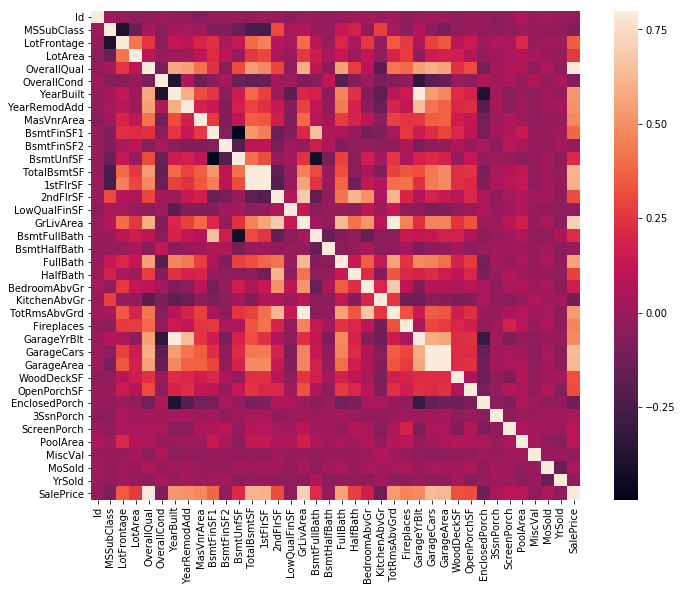

In [7]:
corr_matrix = train_data.corr()

plt.figure(figsize=(12, 9))
sns.heatmap(corr_matrix, vmax=.8, square=True);

In [9]:
corr_matrix.shape[1], train_data.shape[1]

(38, 81)

What did we do?

 * We identified the numeric variables
 * We used *correlation* with the target (`SalePrice`) to find the ones that were more interesting
 * Used correlation with other variables to eliminate variables that represented the same thing (*multi-collinearity*)
 * Later we looked at PCA as an automated way to take *all* numeric variables and derivate a *representation* in terms of a smaller number of inferred variables.
 * Setting `whiten=True` with PCA will also eliminate any multi-collinearity

# What will we do today

1. Find a way to identify the non-numeric variables: a.k.a *categorical* variables
2. Find a way of assigning numeric labels to categorical variables
  1. Handling missing values
3. Look at ways of doing feature selection with categorical variables
4. Look at ways of finding low-dimensionality *representations* using categorical variables, similar to PCA

## Indentifying the categorical variables

In [10]:
train_data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


In [11]:
discrete_vars = train_data.select_dtypes(include=['object']).copy()

In [19]:
discrete_vars.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


### Consider a single categorical variable - Kitchen Quality

In [122]:
discrete_data = discrete_vars.copy()
discrete_data['SalePrice'] = train_data.SalePrice
discrete_data['LogSalePrice'] = np.log(train_data.SalePrice)

In [125]:
kitchen_counts = discrete_data.KitchenQual.value_counts()
kitchen_counts

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64

In [227]:
kitchen_prices = discrete_data \
        .groupby('KitchenQual') \
        ['LogSalePrice', 'SalePrice'] \
        .mean() \
        .sort_values(['SalePrice'])
        
kitchen_prices

,LogSalePrice,SalePrice
KitchenQual,,
Fa,11.504581,105565.205128
TA,11.810592,139962.511565
Gd,12.222337,212116.023891
Ex,12.633614,328554.670000


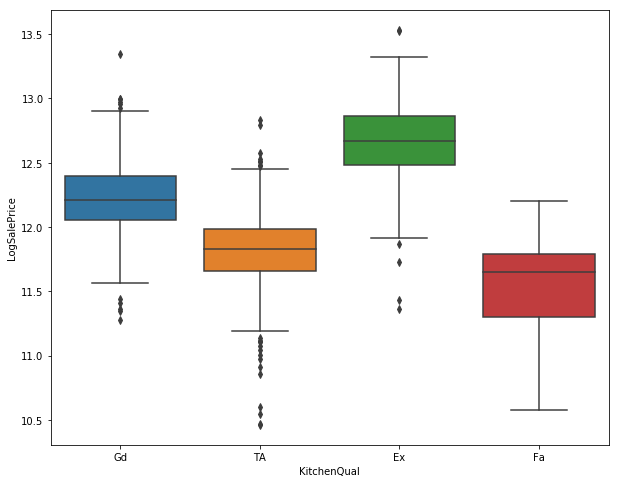

In [285]:
plt.figure(figsize=(10,8 ))
sns.boxplot(x='KitchenQual', y='LogSalePrice', data=discrete_data,)
plt.show()

In [229]:
kitchen_prices.LogSalePrice['Fa'] , kitchen_prices.index.values

(11.504581378345742, array(['Fa', 'TA', 'Gd', 'Ex'], dtype=object))

### Evaluating Categorial Features

In [241]:
from sklearn.feature_selection \
    import f_regression, mutual_info_regression
from sklearn.preprocessing import LabelEncoder, LabelBinarizer

![](http://scikit-learn.org/stable/_images/sphx_glr_plot_f_test_vs_mi_001.png)

For more on this see http://scikit-learn.org/stable/auto_examples/feature_selection/plot_f_test_vs_mi.html#sphx-glr-auto-examples-feature-selection-plot-f-test-vs-mi-py

In [199]:
encoder        = LabelEncoder()
kitchen_labels = encoder.fit_transform(discrete_data.KitchenQual)
binarizer      = LabelBinarizer()
kitchen_bins   = binarizer.fit_transform(discrete_data.KitchenQual)

In [236]:
kitchen_bins

array([[0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       ...,
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1]])

In [250]:
evaluator = SelectKBest(f_regression, k='all')

In [257]:
kitchen_labels.reshape(-1, 1)

array([[2],
       [3],
       [2],
       ...,
       [2],
       [2],
       [3]])

In [282]:
f_regression(kitchen_labels.reshape(-1,1), discrete_data.LogSalePrice)

(array([582.78325323]), array([1.34492752e-108]))

In [272]:
mutual_info_regression(kitchen_labels.reshape(-1,1), discrete_data.LogSalePrice)

/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


array([0.33053656])

In [258]:
anova = evaluator.fit(
    kitchen_labels.reshape(-1, 1),
    discrete_data.LogSalePrice)

"%.1f%%" % ((1 - anova.pvalues_)*100)

'100.0%'

In [224]:
anova = evaluator.fit(
    LabelEncoder().fit_transform(discrete_data.RoofMatl).reshape(-1, 1),
    discrete_data.LogSalePrice)

"%.1f%%" % ((1 - anova.pvalues_)*100)

'81.5%'

In [264]:
anova = evaluator.fit(
    LabelEncoder().fit_transform(discrete_data.Alley.fillna('Missing')).reshape(-1, 1),
    discrete_data.LogSalePrice)

"%.1f%%" % ((1 - anova.pvalues_)*100)

'100.0%'

In [296]:

for colname in discrete_vars.columns.sort_values():
    print (colname + "\n===============")
    
    avgs = discrete_data \
        .groupby([colname]) \
        ['LogSalePrice', 'SalePrice'] \
        .mean() \
        .sort_values(['LogSalePrice'], ascending=False)
    
    counts = discrete_vars[colname].value_counts()
    
    for key in avgs.index.values:
        print ("%-10s  %4d %2.3f   %6.0f" % \
               (key, counts[key], avgs.LogSalePrice[key], avgs.SalePrice[key]))
    
    is_missing_bools = discrete_vars[colname].isna()
    missing_count = is_missing_bools.sum()
    
    # TODO Handle NAs
    as_numbers = LabelEncoder()\
        .fit_transform(
            discrete_data[colname] \
            .fillna('Missing')
        ).reshape(-1, 1)
        
    anova = f_regression(as_numbers, discrete_data.LogSalePrice)
    mutinfo = mutual_info_regression(as_numbers, discrete_data.LogSalePrice)
    
    print()
    print("Missing:    %4d" % missing_count)
    print("ANOVA:    %3.1f%%" % ((1 - anova[1])*100))
    print("Mutual Information: %3.2f" % (mutinfo[0],))
    print()

Alley
Pave          41 11.997   168001
Grvl          50 11.673   122219

Missing:    1369
ANOVA:    100.0%
Mutual Information: 0.03

BldgType
TwnhsE       114 12.059   181959
1Fam        1220 12.048   185764
Duplex        52 11.781   133541
Twnhs         43 11.774   135912
2fmCon        31 11.725   128432

Missing:       0
ANOVA:    99.4%
Mutual Information: 0.04

BsmtCond
Gd            65 12.220   213600
TA          1311 12.043   183633
Fa            45 11.649   121810
Po             2 11.066    64000

Missing:      37
ANOVA:    100.0%
Mutual Information: 0.05

BsmtExposure
Gd           134 12.364   257690
Av           221 12.158   206643
Mn           114 12.095   192790
No           953 11.956   165652

Missing:      38
ANOVA:    100.0%
Mutual Information: 0.06

BsmtFinType1
GLQ          418 12.302   235414
Unf          430 11.964   170671
ALQ          220 11.953   161573
LwQ           74 11.881   151853
BLQ          148 11.868   149494
Rec          133 11.853   146889


/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scal


Missing:      37
ANOVA:    100.0%
Mutual Information: 0.05

BsmtFinType2
ALQ           19 12.167   209942
Unf         1256 12.044   184695
GLQ           14 12.034   180982
LwQ           46 11.978   164364
Rec           54 11.965   164917
BLQ           33 11.888   151101

Missing:      38
ANOVA:    99.4%
Mutual Information: 0.03

BsmtQual
Ex           121 12.640   327041
Gd           618 12.180   202688
TA           649 11.811   140760
Fa            35 11.618   115692

Missing:      37
ANOVA:    100.0%
Mutual Information: 0.27

CentralAir
Y           1365 12.061   186187
N             95 11.492   105264

Missing:       0
ANOVA:    100.0%
Mutual Information: 0.07

Condition1
PosA           8 12.307   225875
PosN          19 12.238   215184
RRNn           5 12.179   212400
RRNe           2 12.159   190750
RRAn          26 12.074   184397
Norm        1260 12.043   184495
RRAe          11 11.822   138400
Feedr         81 11.818   142475
Artery        48 11.742   135092


/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scal


Missing:       0
ANOVA:    100.0%
Mutual Information: 0.02

Condition2
PosA           1 12.692   325000
PosN           2 12.494   284875
RRAe           1 12.155   190000
Norm        1445 12.026   181169
RRAn           1 11.827   136905
Feedr          6 11.671   121167
Artery         2 11.570   106500
RRNn           2 11.435    96750

Missing:       0
ANOVA:    4.0%
Mutual Information: 0.00

Electrical
SBrkr       1334 12.061   186825
FuseA         94 11.660   122197
FuseF         27 11.540   107675
FuseP          3 11.447    97333
Mix            1 11.112    67000

Missing:       1
ANOVA:    100.0%
Mutual Information: 0.04

ExterCond
Ex             3 12.120   201333
TA          1282 12.043   184035
Gd           146 11.969   168898
Fa            28 11.455   102595
Po             1 11.245    76500

Missing:       0
ANOVA:    100.0%
Mutual Information: 0.01

ExterQual
Ex            52 12.764   367361
Gd           488 12.311   231634
TA           906 11.838   144341
Fa            14 11.305

/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scal


Missing:       0
ANOVA:    100.0%
Mutual Information: 0.33

Exterior1st
ImStucc        1 12.476   262000
Stone          2 12.457   258500
VinylSd      515 12.206   213733
CemntBd       61 12.205   231691
BrkFace       50 12.088   194573
Plywood      108 12.041   175942
HdBoard      222 11.952   163077
Stucco        25 11.892   162990
MetalSd      220 11.860   149422
WdShing       26 11.845   150655
Wd Sdng      206 11.839   149842
CBlock         1 11.562   105000
AsbShng       20 11.525   107386
AsphShn        1 11.513   100000
BrkComm        2 11.158    71000

Missing:       0
ANOVA:    100.0%
Mutual Information: 0.09

Exterior2nd
Other          1 12.673   319000
ImStucc       10 12.240   252070
VinylSd      504 12.210   214432
CmentBd       60 12.202   230094
BrkFace       25 12.066   195818
Plywood      142 11.995   168112
HdBoard      207 11.975   167662
Stone          5 11.898   158225
Wd Shng       38 11.892   161329
MetalSd      214 11.862   149803
Stucco        26 11.853   155

/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scal



Missing:       0
ANOVA:    100.0%
Mutual Information: 0.21

Functional
Typ         1360 12.039   183429
Min1          31 11.862   146385
Maj1          14 11.860   153948
Mod           15 11.859   168393
Min2          34 11.845   144241
Sev            1 11.768   129000
Maj2           5 11.317    85800

Missing:       0
ANOVA:    100.0%
Mutual Information: 0.01

GarageCond
TA          1326 12.070   187886
Gd             9 12.051   179930
Ex             2 11.728   124000
Fa            35 11.597   114654
Po             7 11.573   108500

Missing:      81
ANOVA:    100.0%
Mutual Information: 0.08

GarageFinish
Fin          352 12.321   240053
RFn          422 12.173   202069
Unf          605 11.819   142156

Missing:      81
ANOVA:    100.0%
Mutual Information: 0.17

GarageQual
Gd            14 12.220   215861
Ex             3 12.175   241000
TA          1311 12.069   187490
Fa            48 11.675   123573
Po             3 11.472   100167


/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scal


Missing:      81
ANOVA:    100.0%
Mutual Information: 0.07

GarageType
BuiltIn       88 12.375   254752
Attchd       870 12.161   202893
Basment       19 11.916   160571
2Types         6 11.899   151283
Detchd       387 11.766   134091
CarPort        9 11.588   109962

Missing:      81
ANOVA:    100.0%
Mutual Information: 0.20

Heating
GasA        1428 12.032   182021
GasW          18 11.931   166632
OthW           2 11.742   125750
Wall           4 11.430    92100
Floor          1 11.191    72500
Grav           7 11.166    75271

Missing:       0
ANOVA:    100.0%
Mutual Information: 0.01

HeatingQC
Ex           741 12.208   214914
Gd           241 11.910   156859
TA           428 11.816   142363
Fa            49 11.637   123919
Po             1 11.374    87000


/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)



Missing:       0
ANOVA:    100.0%
Mutual Information: 0.13

HouseStyle
2.5Fin         8 12.194   220000
2Story       445 12.183   210052
SLvl          65 12.002   166703
1Story       726 11.994   175985
2.5Unf        11 11.909   157355
1.5Fin       154 11.814   143117
SFoyer        37 11.786   135074
1.5Unf        14 11.595   110150

Missing:       0
ANOVA:    100.0%
Mutual Information: 0.08

KitchenQual
Ex           100 12.634   328555
Gd           586 12.222   212116
TA           735 11.811   139963
Fa            39 11.505   105565

Missing:       0
ANOVA:    100.0%
Mutual Information: 0.32

LandContour
HLS           50 12.259   231534
Low           36 12.120   203661
Lvl         1311 12.023   180184
Bnk           63 11.811   143104

Missing:       0
ANOVA:    78.3%
Mutual Information: 0.03

LandSlope


/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scal

Sev           13 12.131   204379
Mod           65 12.077   196734
Gtl         1382 12.021   179957

Missing:       0
ANOVA:    85.9%
Mutual Information: 0.00

LotConfig
CulDSac       94 12.250   223855
FR3            4 12.196   208475
FR2           47 12.035   177935
Corner       263 12.027   181623
Inside      1052 12.002   176938

Missing:       0
ANOVA:    99.5%
Mutual Information: 0.00

LotShape
IR2           41 12.318   239833
IR3           10 12.205   216036
IR1          484 12.163   206102
Reg          925 11.936   164755


/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scal


Missing:       0
ANOVA:    100.0%
Mutual Information: 0.09

MSZoning
FV            65 12.247   214014
RL          1151 12.086   191005
RH            16 11.750   131558
RM           218 11.693   126317
C (all)       10 11.118    74528

Missing:       0
ANOVA:    100.0%
Mutual Information: 0.12

MasVnrType
Stone        128 12.425   265584
BrkFace      445 12.164   204692
None         864 11.893   156222
BrkCmn        15 11.853   146318

Missing:       8
ANOVA:    100.0%
Mutual Information: 0.11

MiscFeature
TenC           1 12.429   250000
Gar2           2 12.042   170750
Shed          49 11.868   151188
Othr           2 11.357    94000

Missing:    1406
ANOVA:    99.3%
Mutual Information: 0.01

Neighborhood
NoRidge       41 12.676   335295
NridgHt       77 12.619   316271
StoneBr       25 12.585   310499
Timber        38 12.363   242247
Veenker       11 12.344   238773
Somerst       86 12.296   225380
ClearCr       28 12.240   212565
Crawfor       51 12.207   210625
Blmngtn       17 12

/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scal


Missing:       0
ANOVA:    100.0%
Mutual Information: 0.11

PavedDrive
Y           1340 12.060   186434
P             30 11.761   132330
N             90 11.578   115039

Missing:       0
ANOVA:    100.0%
Mutual Information: 0.05

PoolQC
Ex             2 12.944   490000
Fa             2 12.268   215500
Gd             3 12.186   201990

Missing:    1453
ANOVA:    99.9%
Mutual Information: 0.01

RoofMatl
WdShngl        6 12.763   390250
Membran        1 12.395   241500
WdShake        5 12.385   241400
Metal          1 12.101   180000
Tar&Grv       11 12.068   185406
CompShg     1434 12.019   179804
ClyTile        1 11.983   160000
Roll           1 11.828   137000

Missing:       0
ANOVA:    100.0%
Mutual Information: 0.01

RoofStyle
Shed           2 12.312   225000
Hip          286 12.184   218877
Flat          13 12.123   194690
Mansard        7 12.057   180568
Gable       1141 11.984   171484
Gambrel       11 11.797   148909


/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scal


Missing:       0
ANOVA:    100.0%
Mutual Information: 0.01

SaleCondition
Partial      125 12.447   272292
Normal      1198 12.005   175202
Alloca        12 11.914   167377
Family        20 11.870   149600
Abnorml      101 11.789   146527
AdjLand        4 11.529   104125

Missing:       0
ANOVA:    100.0%
Mutual Information: 0.08

SaleType
Con            2 12.484   269600
New          122 12.459   274945
CWD            4 12.198   210600
ConLI          5 12.045   200390
WD          1267 11.991   173402
COD           43 11.827   143973
ConLD          9 11.773   138781
ConLw          5 11.770   143700
Oth            3 11.675   119850

Missing:       0
ANOVA:    83.9%
Mutual Information: 0.07

Street
Pave        1454 12.026   181131
Grvl           6 11.667   130190

Missing:       0
ANOVA:    97.2%
Mutual Information: 0.02

Utilities
AllPub      1459 12.024   180951
NoSeWa         1 11.831   137500

Missing:       0
ANOVA:    37.0%
Mutual Information: 0.00



/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


### Selecting Features Automatically

In [333]:
from sklearn.feature_selection import SelectKBest

select = SelectKBest(f_regression, k=8)
X = discrete_vars.apply(lambda col: LabelEncoder().fit_transform(col.fillna('Missing')))
y = discrete_data.LogSalePrice

select.fit(X,y)

SelectKBest(k=8, score_func=<function f_regression at 0x117463840>)

In [334]:
discrete_vars.columns[select.get_support()]

Index(['ExterQual', 'Foundation', 'BsmtQual', 'HeatingQC', 'CentralAir',
       'KitchenQual', 'GarageType', 'GarageFinish'],
      dtype='object')

In [335]:
select = SelectKBest(mutual_info_regression, k=8)
X = discrete_vars.apply(lambda col: LabelEncoder().fit_transform(col.fillna('Missing')))
y = discrete_data.LogSalePrice

select.fit(X,y)
discrete_vars.columns[select.get_support()]

/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


Index(['ExterQual', 'Foundation', 'BsmtQual', 'HeatingQC', 'KitchenQual',
       'FireplaceQu', 'GarageType', 'GarageFinish'],
      dtype='object')

In [355]:
discrete_values.columns

Index(['BsmtCond', 'BsmtQual', 'ExterCond', 'ExterQual', 'FireplaceQu',
       'GarageCond', 'GarageQual', 'HeatingQC', 'KitchenQual', 'LogSalePrice'],
      dtype='object')

### The pseudo-correlation Hack

In [307]:
qual_mapping = { '0' : 0, 'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1 }
qual_cols = [ "BsmtCond", "BsmtQual", "ExterCond", "ExterQual", \
              "FireplaceQu", "GarageCond", "GarageQual", "HeatingQC", \
              "KitchenQual" ]

discrete_values = pd.DataFrame()
for col in qual_cols:
    discrete_values[col] = discrete_vars[col] \
        .fillna('0') \
        .apply(lambda cell: qual_mapping[cell])
        
discrete_values['LogSalePrice'] = discrete_data.LogSalePrice

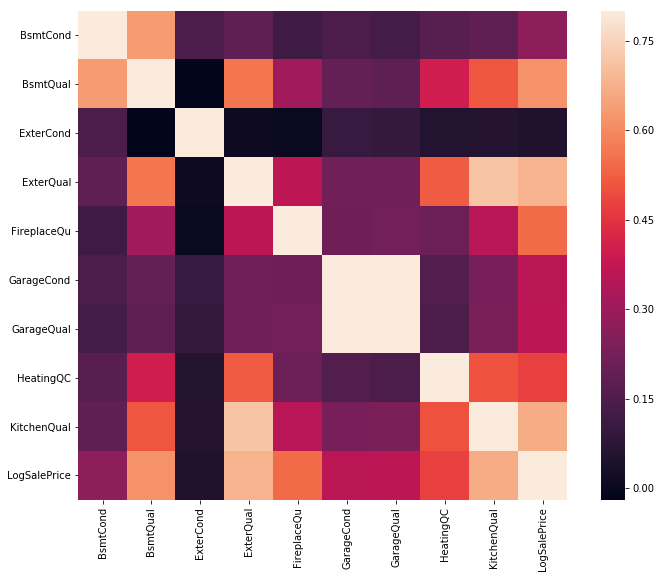

In [308]:
plt.figure(figsize=(12, 9))
sns.heatmap(discrete_values.corr(), vmax=.8, square=True);

### Summary of Feature Encoding and Selection

There are several manual steps to first consider:

 1. Use `LabelEncoder` just to get statistic tests working
     1. Use `.fillna()` to handles missing values, but take care with it
         1. Is the replacement sensible?
         2. Are values missing at random?
         3. How well distributed are the non-missing values vs the missing values.
 2. Then switch to `LabelBinarizer` once you want to do learning
 1. Where the number of values is < 10% of the data, you can't learning anything reliably
     1. So bunch "the rest" into a single value if they're similar
     2. Or delete entirely
 2. Where only one value dominates, just discard the entire variable.
 3. Where there is an enormous number of values, and you don't have time to do anything clever as in the case of addresses, represent each one as the average price for that group.
 4. You can use `SelectKBest` or the correlation trick to select variables

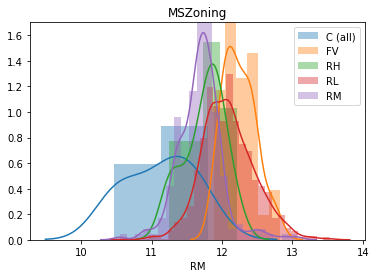

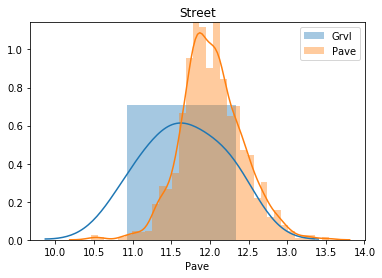

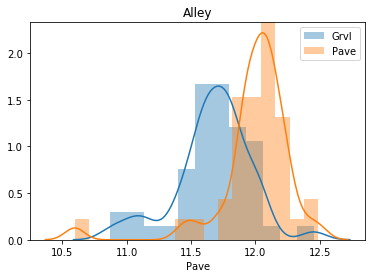

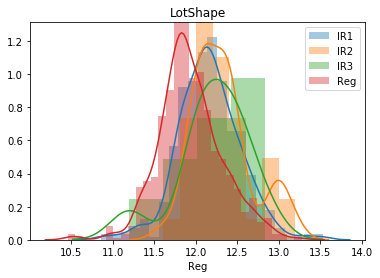

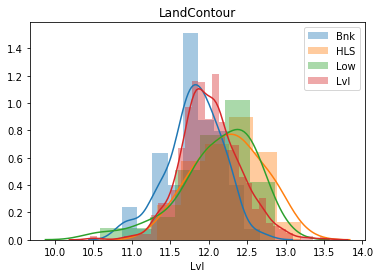

/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/nonparametric/bandwidths.py:22: RuntimeWarning: invalid value encountered in minimum
  return np.minimum(np.std(X, axis=0, ddof=1), IQR)
/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


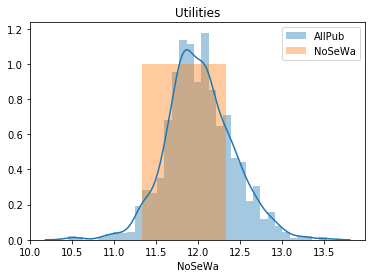

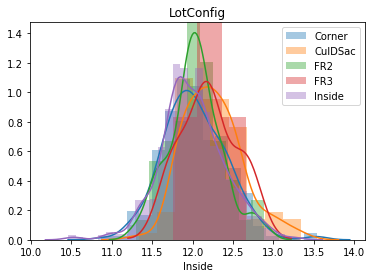

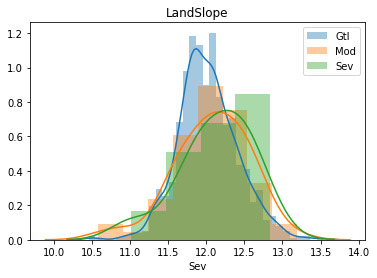

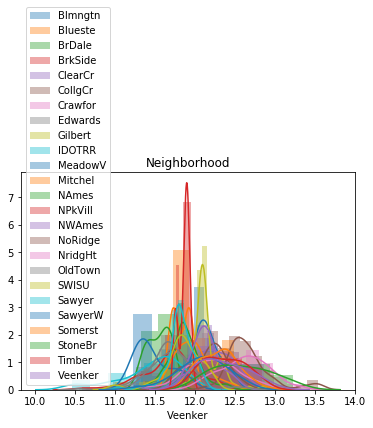

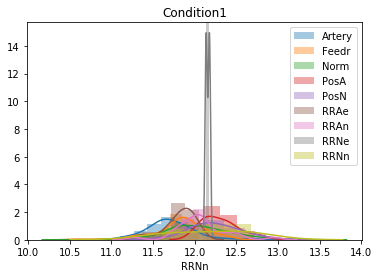

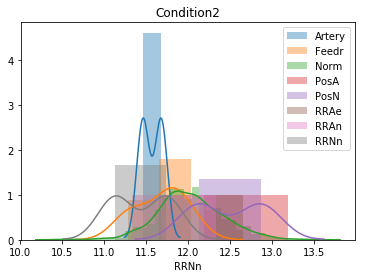

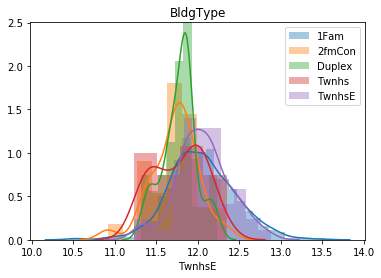

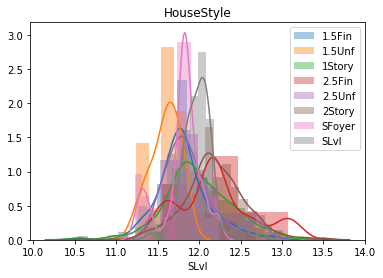

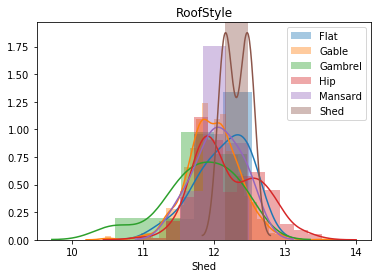

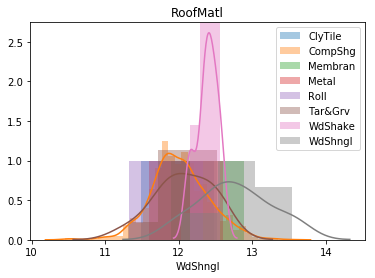

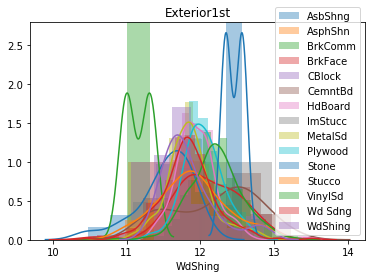

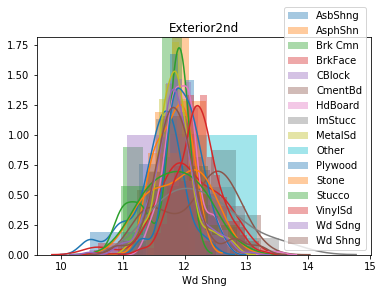

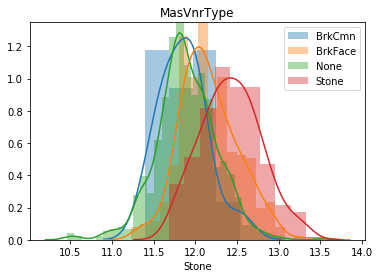

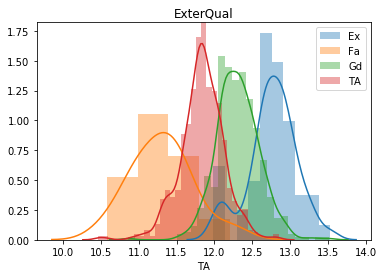

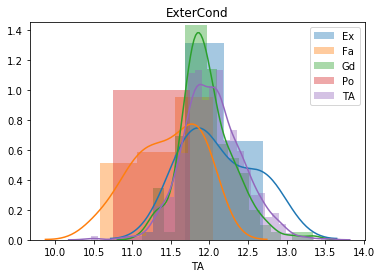

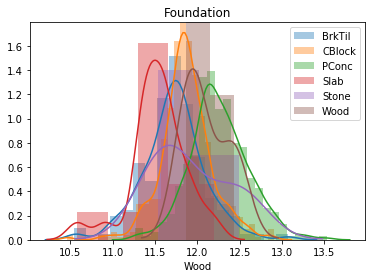

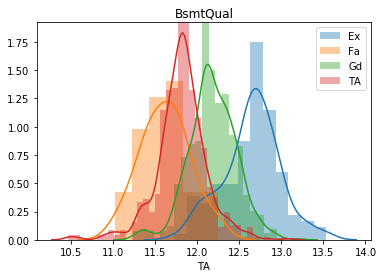

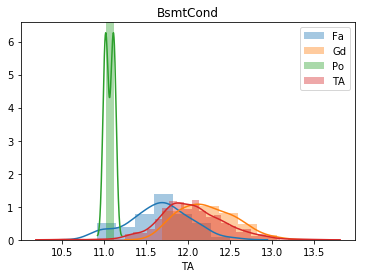

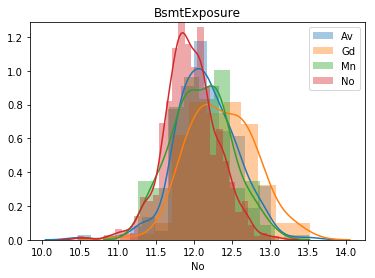

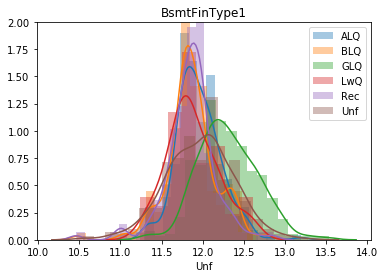

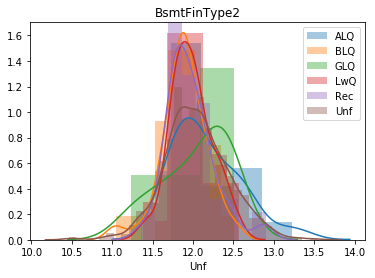

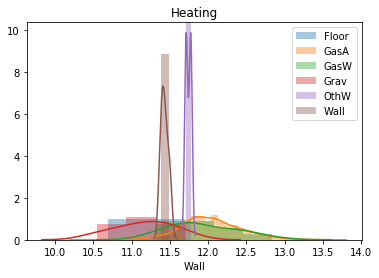

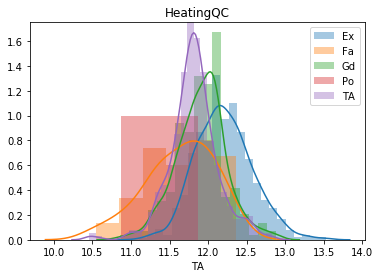

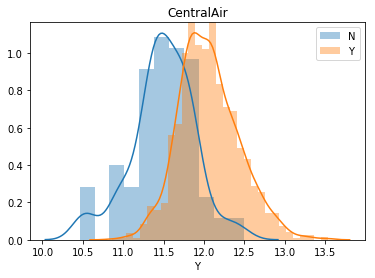

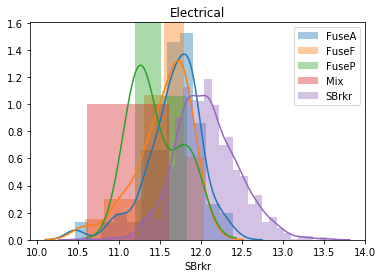

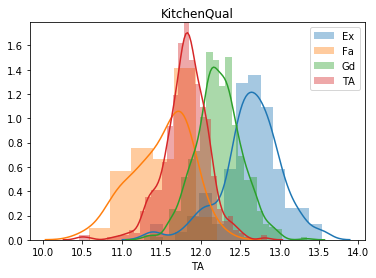

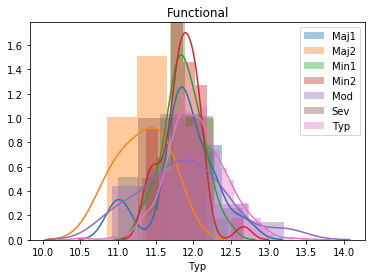

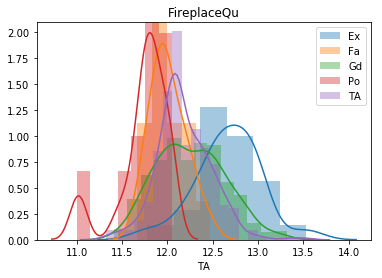

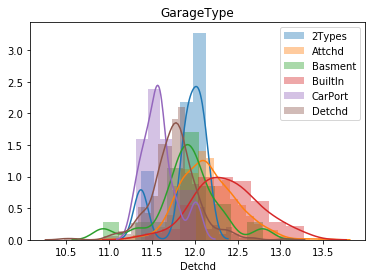

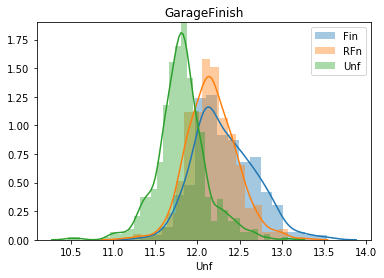

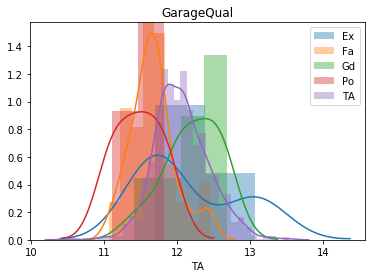

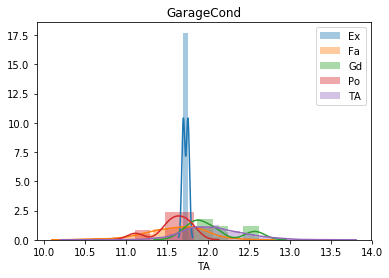

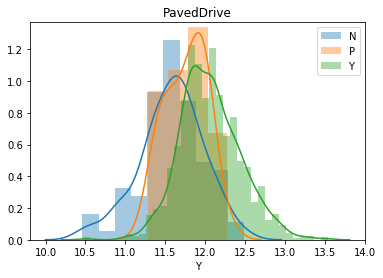

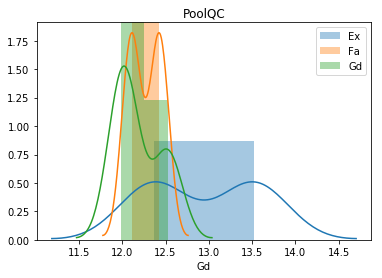

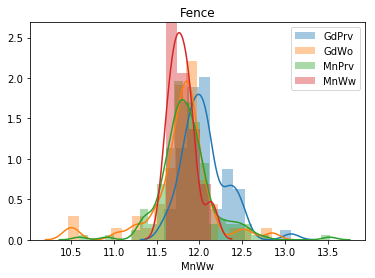

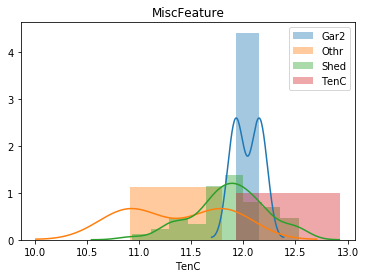

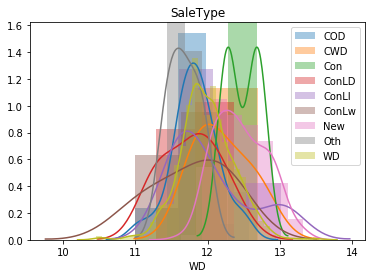

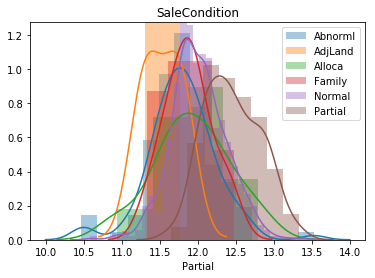

In [332]:
for colname in discrete_vars.columns:
    discrete_data \
        .groupby([colname]) \
        .LogSalePrice \
        .apply(lambda col: sns.distplot(col, label=col.name))
    
    plt.title(colname)
    plt.legend()    
    plt.show()



# Modelling Using only Categorical Features

In [357]:
cols = ['ExterQual', 'Foundation', 'BsmtQual', 'HeatingQC', 'CentralAir',
       'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish']

In [363]:
X_cat_tmp = pd.get_dummies(discrete_data[cols])
X_cat_tmp.head()

,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf
0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0
2,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0
3,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1
4,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0


In [364]:
X_cat_tmp.shape

(1460, 39)

In [367]:
X_cat_tmp_sums = X_cat_tmp.sum(axis=0)
X_cat_tmp_sums

ExterQual_Ex            52
ExterQual_Fa            14
ExterQual_Gd           488
ExterQual_TA           906
Foundation_BrkTil      146
Foundation_CBlock      634
Foundation_PConc       647
Foundation_Slab         24
Foundation_Stone         6
Foundation_Wood          3
BsmtQual_Ex            121
BsmtQual_Fa             35
BsmtQual_Gd            618
BsmtQual_TA            649
HeatingQC_Ex           741
HeatingQC_Fa            49
HeatingQC_Gd           241
HeatingQC_Po             1
HeatingQC_TA           428
CentralAir_N            95
CentralAir_Y          1365
KitchenQual_Ex         100
KitchenQual_Fa          39
KitchenQual_Gd         586
KitchenQual_TA         735
FireplaceQu_Ex          24
FireplaceQu_Fa          33
FireplaceQu_Gd         380
FireplaceQu_Po          20
FireplaceQu_TA         313
GarageType_2Types        6
GarageType_Attchd      870
GarageType_Basment      19
GarageType_BuiltIn      88
GarageType_CarPort       9
GarageType_Detchd      387
GarageFinish_Fin       352
G

In [369]:
X_cat = X_cat[X_cat_tmp.columns[X_cat_tmp_sums >= 140]]

In [391]:
X_cat.fillna(0)
X_cat.head()

,ExterQual_Gd,ExterQual_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,BsmtQual_Gd,BsmtQual_TA,HeatingQC_Ex,HeatingQC_Gd,HeatingQC_TA,CentralAir_Y,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Gd,FireplaceQu_TA,GarageType_Attchd,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf
0,1,0,0,0,1,1,0,1,0,0,1,1,0,0,0,1,0,0,1,0
1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,1,0,0,1,0
2,1,0,0,0,1,1,0,1,0,0,1,1,0,0,1,1,0,0,1,0
3,0,1,1,0,0,0,1,0,1,0,1,1,0,1,0,0,1,0,0,1
4,1,0,0,0,1,1,0,1,0,0,1,1,0,0,1,1,0,0,1,0


In [392]:
X_cat.shape

(1460, 20)

In [372]:
from sklearn.linear_model import LinearRegression

In [379]:
discrete_data.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,SalePrice,LogSalePrice
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,208500,12.247694
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,181500,12.109011
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,223500,12.317167
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml,140000,11.849398
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,250000,12.429216


In [400]:
X_cat_train = X_cat.iloc[:1000, :]
X_cat_test  = X_cat.iloc[1000:, :]

y_train = discrete_data.iloc[:1000, -1]
y_test  = discrete_data.iloc[1000:, -1]

In [420]:
linear_model = LinearRegression().fit(X_cat_train, y_train)

In [421]:
y_predict = linear_model.predict(X_cat_test)

In [422]:
from sklearn.metrics import mean_squared_error

In [423]:
np.sqrt(mean_squared_error(np.exp(y_test), np.exp(y_predict)))

50387.004472167544

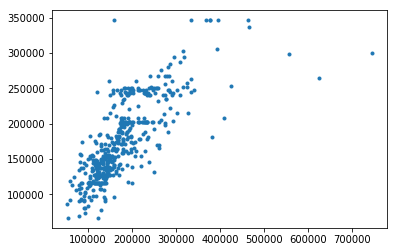

In [424]:
plt.plot(np.exp(y_test), np.exp(y_predict), '.')

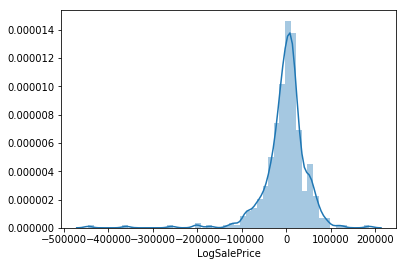

In [427]:
sns.distplot(np.exp(y_predict) - np.exp(y_test))

In [438]:
nhood_prices = discrete_data\
    .groupby(["Neighborhood"]) \
    .LogSalePrice \
    .mean()

In [437]:
neighborhood_values['Blmngtn']

12.16941561799284

In [440]:
nhood_mapping = dict([(nhood, nhood_prices[nhood]) \
      for nhood in neighborhood_values.index.values])

In [443]:
X_cat_2 = X_cat.copy()
X_cat_2['nhood'] = discrete_data.Neighborhood.apply(\
                     lambda cell: nhood_mapping[cell])

In [444]:
X_cat_train = X_cat_2.iloc[:1000, :]
X_cat_test  = X_cat_2.iloc[1000:, :]

y_train = discrete_data.iloc[:1000, -1]
y_test  = discrete_data.iloc[1000:, -1]

In [445]:
linear_model = LinearRegression().fit(X_cat_train, y_train)
y_predict = linear_model.predict(X_cat_test)
np.sqrt(mean_squared_error(np.exp(y_test), np.exp(y_predict)))

44984.36152608128

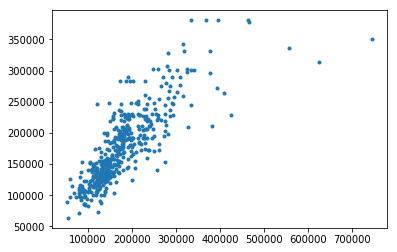

In [446]:
plt.plot(np.exp(y_test), np.exp(y_predict), '.')

In [449]:
from sklearn.ensemble import GradientBoostingRegressor

In [450]:
gbr_model = GradientBoostingRegressor().fit(X_cat_train, y_train)
y_predict = gbr_model.predict(X_cat_test)
np.sqrt(mean_squared_error(np.exp(y_test), np.exp(y_predict)))

40164.570739198825

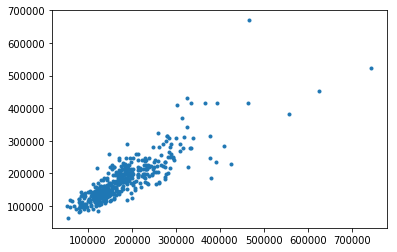

In [451]:
plt.plot(np.exp(y_test), np.exp(y_predict), '.')